In [122]:
import sys 
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd
#sys.path.append(os.path.abspath("/mnt/home/yjo10/ceph/CAMELS/ST_DMO/MINE/"))
import matplotlib.pyplot as plt
import seaborn as sns
import pywph as pw
from scipy import stats
sys.path.append(os.path.abspath("../utils/"))
from wph_utils import WPH
sns.set()
sys.path.append(os.path.abspath("/mnt/home/yjo10/ceph/myutils/"))
import plt_utils as pu
from skimage.metrics import structural_similarity as ssim

## LH set

In [141]:
field = "HI"; sim="IllustrisTNG"
fmap = f"/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_{field}_{sim}_LH_z=0.00.npy"
maps_tng = np.log10(np.load(fmap))
field = "HI"; sim="SIMBA"
fmap = f"/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_{field}_{sim}_LH_z=0.00.npy"
maps_sim = np.log10(np.load(fmap))
field = "HI"; sim="Astrid"
fmap = f"/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_{field}_{sim}_LH_z=0.00.npy"
maps_ast = np.log10(np.load(fmap))

In [84]:
maps_tng.shape

(990, 256, 256)

In [ ]:
fig, axes = pu.generateAxesForMultiplePlots(shape=(3,1),figsize=(20,6.6),
                                      hspace=0.1,wspace=0.1)
i=3
axes[0,0].imshow(maps_tng[i])
axes[1,0].imshow(maps_sim[i])
axes[2,0].imshow(maps_ast[i])
axes[0,0].axis("off")
axes[1,0].axis("off")
axes[2,0].axis("off")


In [142]:
minimum = np.inf
min_index = -1
i=10
for j in range(15000):
    diff = np.abs(maps_ast[j]-maps_sim[i]).mean()
    if diff < minimum:
        minimum = diff
        min_index = j
diff = maps_ast[min_index]-maps_tng[i]
print(minimum,min_index)

0.58471805 11598


In [147]:
maximum = -np.inf
min_index = -1
i=0
for j in range(15000):
    diff = ssim(maps_tng[j],maps_ast[i])
    if diff >  maximum:
        maximum = diff
        max_index = j
diff = maps_tng[max_index]-maps_sim[i]
print(maximum,max_index)

0.05881971049465789 12569


(-0.5, 255.5, 255.5, -0.5)

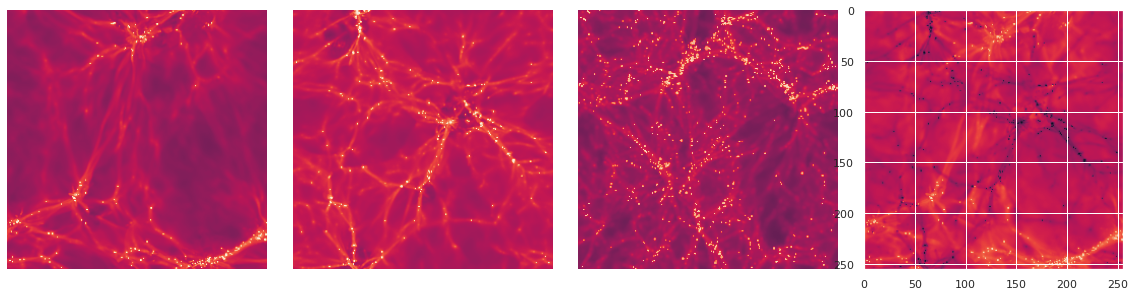

In [148]:
fig, axes = pu.generateAxesForMultiplePlots(shape=(4,1),figsize=(20,6.6),
                                      hspace=0.1,wspace=0.1)

axes[0,0].imshow(maps_tng[max_index],vmin=0,vmax=11)
axes[1,0].imshow(maps_sim[i],vmin=0,vmax=11)
axes[2,0].imshow(maps_ast[i],vmin=0,vmax=11)
axes[3,0].imshow(diff)
axes[0,0].axis("off")
axes[1,0].axis("off")
axes[2,0].axis("off")


## 1P set

In [111]:
field = "Mtot"; sim="IllustrisTNG"
fmap = f"/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_{field}_{sim}_1P_z=0.00.npy"
tmaps_tng = np.log10(np.load(fmap))
sim="SIMBA"
fmap = f"/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_{field}_{sim}_1P_z=0.00.npy"
tmaps_sim = np.log10(np.load(fmap))
sim="Astrid"
fmap = f"/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_{field}_{sim}_1P_z=0.00.npy"
tmaps_ast = np.log10(np.load(fmap))

In [149]:
field = "HI"; sim="IllustrisTNG"
fmap = f"/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_{field}_{sim}_1P_z=0.00.npy"
maps_tng = np.log10(np.load(fmap))
field = "HI"; sim="SIMBA"
fmap = f"/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_{field}_{sim}_1P_z=0.00.npy"
maps_sim = np.log10(np.load(fmap))
field = "HI"; sim="Astrid"
fmap = f"/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_{field}_{sim}_1P_z=0.00.npy"
maps_ast = np.log10(np.load(fmap))

(-0.5, 255.5, 255.5, -0.5)

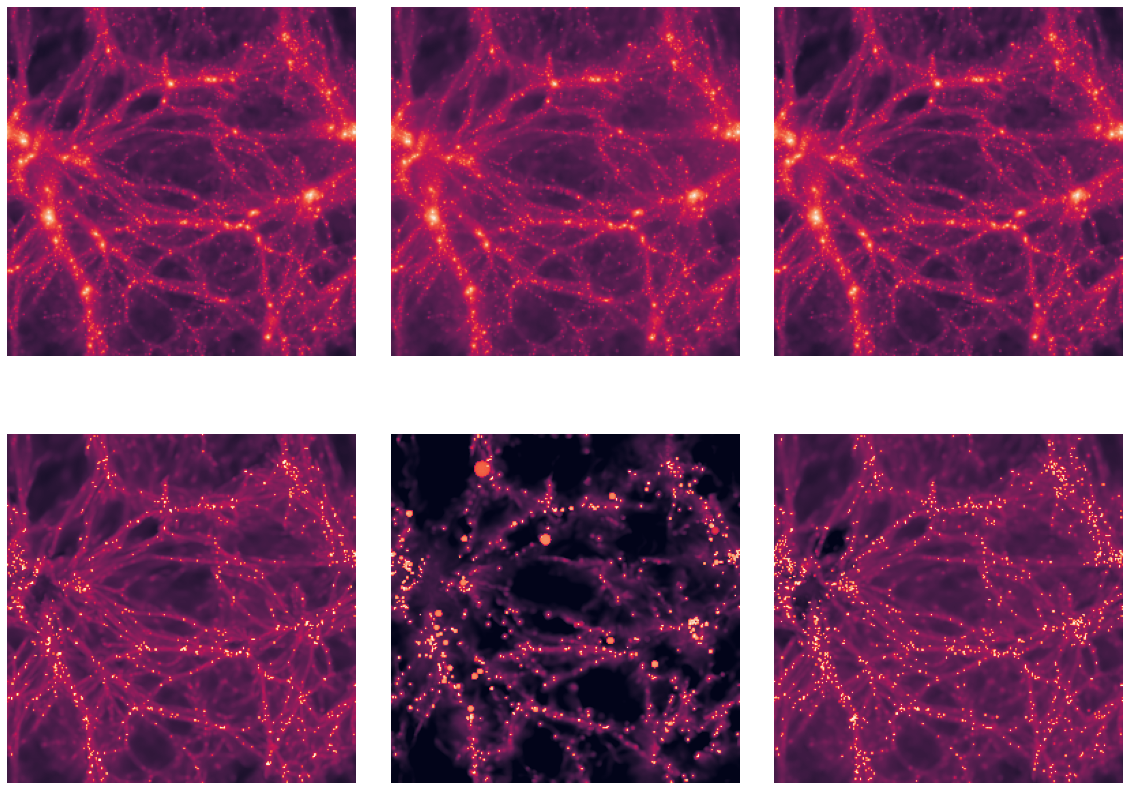

In [117]:
fig, axes = pu.generateAxesForMultiplePlots(shape=(3,2),figsize=(20,15),
                                      hspace=0.1,wspace=0.1)
i=15*10

axes[0,0].imshow(tmaps_tng[i],vmin=10,vmax=14)
axes[1,0].imshow(tmaps_sim[i],vmin=10,vmax=14)
axes[2,0].imshow(tmaps_ast[i],vmin=10,vmax=14)
#axes[3,0].imshow(diff)
axes[0,0].axis("off")
axes[1,0].axis("off")
axes[2,0].axis("off")

axes[0,1].imshow(maps_tng[i],vmin=2,vmax=11)
axes[1,1].imshow(maps_sim[i],vmin=2,vmax=11)
axes[2,1].imshow(maps_ast[i],vmin=2,vmax=11)
#axes[3,0].imshow(diff)
axes[0,1].axis("off")
axes[1,1].axis("off")
axes[2,1].axis("off")


(-0.5, 255.5, 255.5, -0.5)

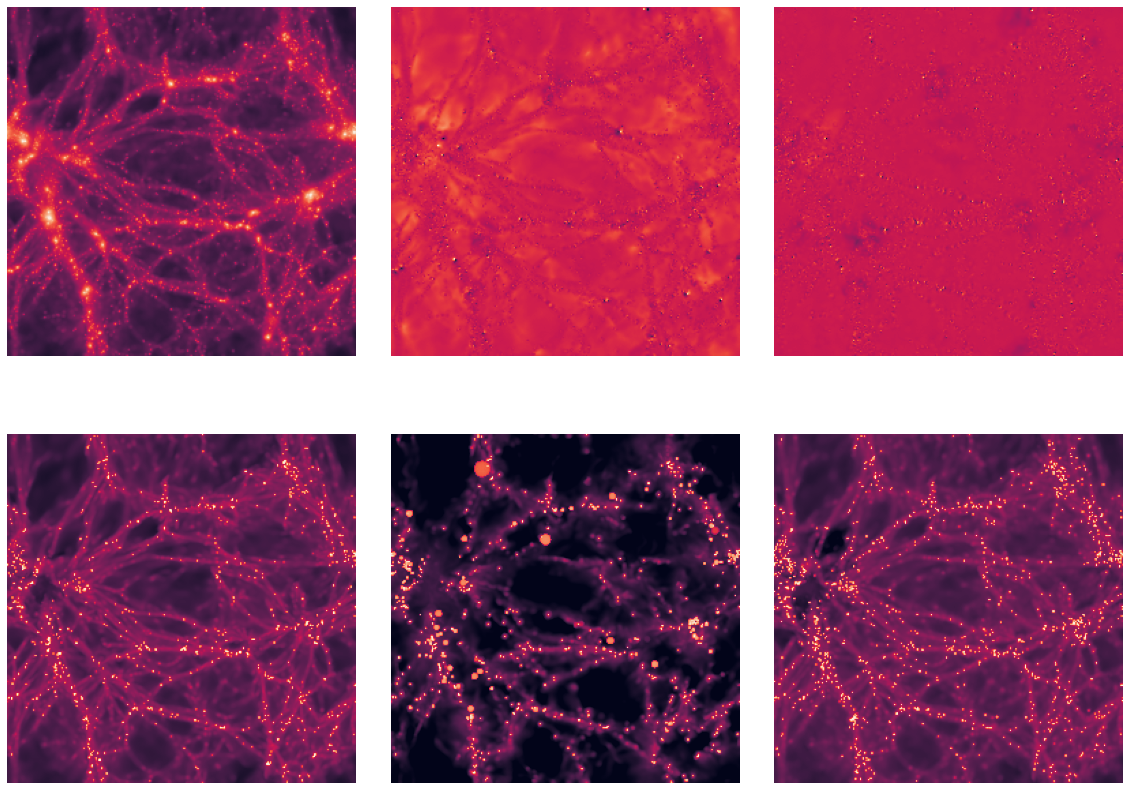

In [118]:
fig, axes = pu.generateAxesForMultiplePlots(shape=(3,2),figsize=(20,15),
                                      hspace=0.1,wspace=0.1)
i=15*10

axes[0,0].imshow(tmaps_tng[i],vmin=10,vmax=14)
axes[1,0].imshow(tmaps_sim[i]-tmaps_tng[i],vmin=-1,vmax=1)
axes[2,0].imshow(tmaps_ast[i]-tmaps_tng[i],vmin=-1,vmax=1)
#axes[3,0].imshow(diff)
axes[0,0].axis("off")
axes[1,0].axis("off")
axes[2,0].axis("off")

axes[0,1].imshow(maps_tng[i],vmin=2,vmax=11)
axes[1,1].imshow(maps_sim[i],vmin=2,vmax=11)
axes[2,1].imshow(maps_ast[i],vmin=2,vmax=11)
#axes[3,0].imshow(diff)
axes[0,1].axis("off")
axes[1,1].axis("off")
axes[2,1].axis("off")


(-0.5, 255.5, 255.5, -0.5)

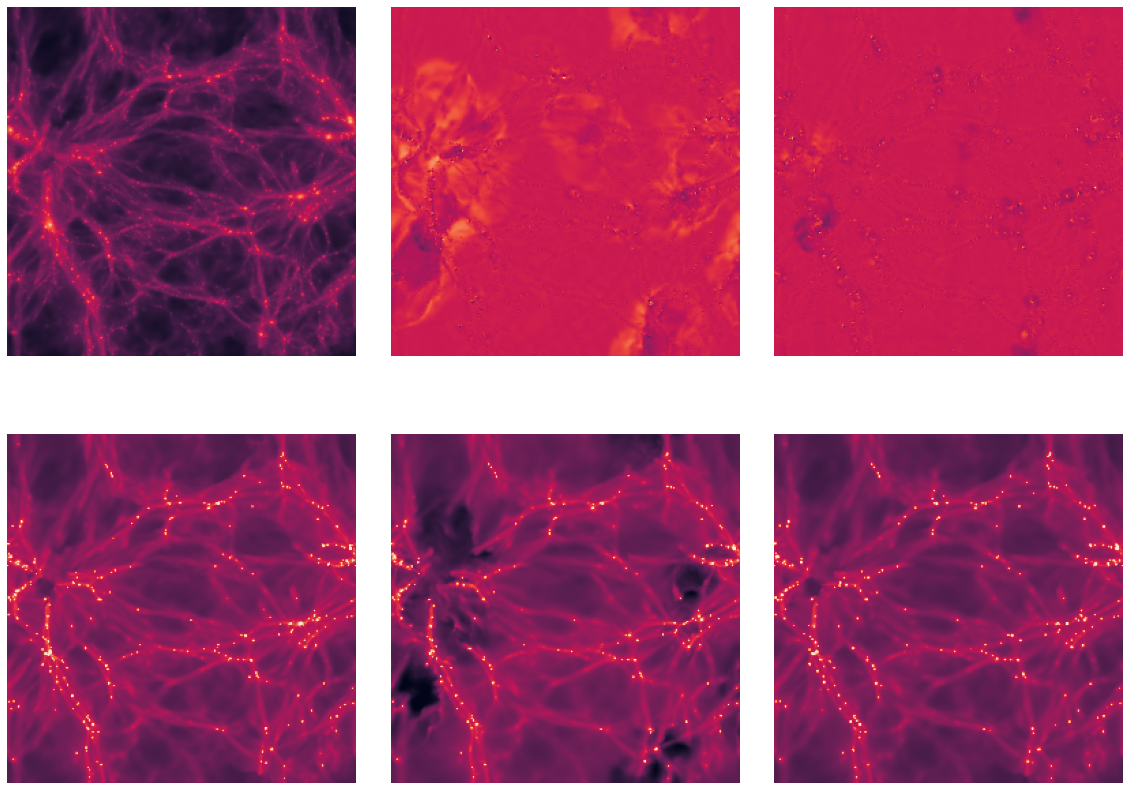

In [121]:
fig, axes = pu.generateAxesForMultiplePlots(shape=(3,2),figsize=(20,15),
                                      hspace=0.1,wspace=0.1)
i=15*1

axes[0,0].imshow(tmaps_tng[i],vmin=10,vmax=14)
axes[1,0].imshow(tmaps_sim[i]-tmaps_tng[i],vmin=-1,vmax=1)
axes[2,0].imshow(tmaps_ast[i]-tmaps_tng[i],vmin=-1,vmax=1)
#axes[3,0].imshow(diff)
axes[0,0].axis("off")
axes[1,0].axis("off")
axes[2,0].axis("off")

axes[0,1].imshow(maps_tng[i],vmin=2,vmax=11)
axes[1,1].imshow(maps_sim[i],vmin=2,vmax=11)
axes[2,1].imshow(maps_ast[i],vmin=2,vmax=11)
#axes[3,0].imshow(diff)
axes[0,1].axis("off")
axes[1,1].axis("off")
axes[2,1].axis("off")


In [139]:
ssim(tmaps_sim[i],tmaps_tng[i])

0.9408762881223195

In [138]:
i=15*20
ssim(maps_sim[i],maps_tng[i])

0.447227182123684

In [152]:
mean_ssim_tng_simba = 0
for i in range(990):
    mean_ssim_tng_simba += ssim(maps_tng[i],maps_sim[i])
mean_ssim_tng_simba /= 990

mean_ssim_tng_ast = 0
for i in range(990):
    mean_ssim_tng_ast += ssim(maps_tng[i],maps_ast[i])
mean_ssim_tng_ast /= 990


In [153]:
mean_ssim_tng_simba,mean_ssim_tng_ast

(0.5139933186732998, 0.8882014921486995)